In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
column_names = [
    'class',
    'age',
    'menopause',
    'tumor-size',
    'inv-nodes',
    'node-caps',
    'deg-malig',
    'breast',
    'breast-quad',
    'irradiat'
]
df=pd.read_csv('breast-cancer.data',names=column_names)
df.head()


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [34]:
df.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [35]:
df.shape

(286, 10)

In [36]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
class,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
age,30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49
menopause,premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno
tumor-size,30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24
inv-nodes,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
node-caps,no,no,no,no,no,no,no,no,no,no
deg-malig,3,2,2,2,2,2,2,1,2,2
breast,left,right,left,right,right,left,left,left,left,right
breast-quad,left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up
irradiat,no,no,no,no,no,no,no,no,no,no


In [37]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals= df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("." * 50)

Column 'class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
..................................................
Column 'age' (6 unique values):
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
..................................................
Column 'menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
..................................................
Column 'tumor-size' (11 unique values):
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
..................................................
Column 'inv-nodes' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
..................................................
Column 'node-caps' (3 unique values):
['no' 'yes' '?']
..................................................
Column 'breast' (2 unique values):
['left' 'right']
..................................................
Column 'breast-quad' (6 unique values):
['left_low' 'right_up' 'left_up' 'right_low' 'central' 

In [38]:
for col in df.columns:
    # Count of '?' entries
    q_count = df[col][df[col] == '?'].count()
    # Count of actual NaN entries
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Column 'node-caps': '?' = 8, NaN = 0, Total missing = 8
Column 'breast-quad': '?' = 1, NaN = 0, Total missing = 1


In [39]:
import numpy as np
df_missing = df.replace("?", np.nan)


missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'node-caps': 2.80% missing (including '?')
Column 'breast-quad': 0.35% missing (including '?')


The percentage of missing values is very low. So removing them will not affect the accuracy of the model.

In [40]:
df.replace('?',np.nan,inplace=True)

We want to predict whether the patient will experience recurrence of cancer based on their clinical results. . Since we have the information about which breast the cancer is present in, 'breast-quad' is not necessary to build the model

In [41]:
df=df.drop(['breast-quad'],axis=1)
df.dropna(subset=['node-caps'],inplace=True)

In [11]:
df.shape

(278, 9)

In [42]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

class 0
age 0
menopause 0
tumor-size 0
inv-nodes 0
node-caps 0
breast 0
irradiat 0


In [43]:
df['class']=df['class'].replace('no-recurrence-events',0)
df['class']=df['class'].replace('recurrence-events',1)
df['class'].value_counts()

/tmp/ipykernel_3981/44797081.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class']=df['class'].replace('recurrence-events',1)


class
0    196
1     82
Name: count, dtype: int64

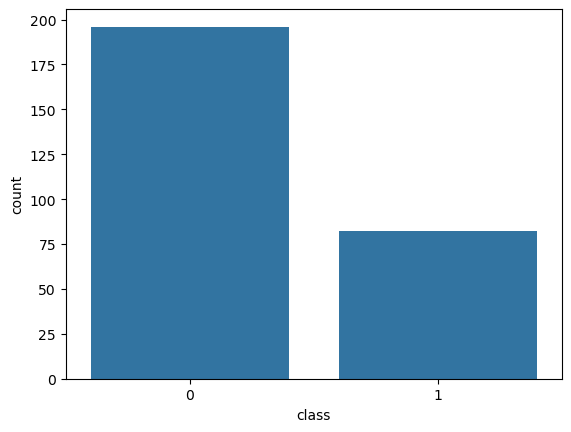

In [44]:
sns.countplot(x='class',data=df)
plt.show()


From the graph, we can understand that there is a big difference between the proportion of patients getting recurrence of cancer and those who don't.

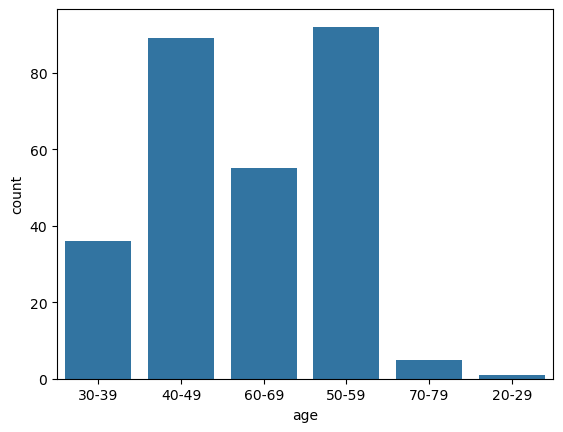

In [45]:
sns.countplot(x='age',data=df)
plt.show()

 Let's convert age to continuous numeric values.

In [46]:
df['age']=df['age'].replace({'20-29':25,'30-39':35,'40-49':45,'50-59':55,'60-69':65,'70-79':75})

/tmp/ipykernel_3981/524912557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age']=df['age'].replace({'20-29':25,'30-39':35,'40-49':45,'50-59':55,'60-69':65,'70-79':75})


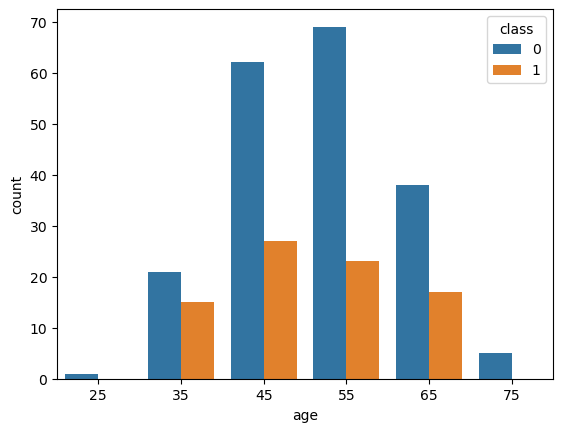

In [47]:
sns.countplot(x='age',hue='class',data=df)
plt.show()

Recurrence events are more frequent in ages 45,55,65, and less frequent in 75, and no recurrence is for age 25. So let's combine them. 

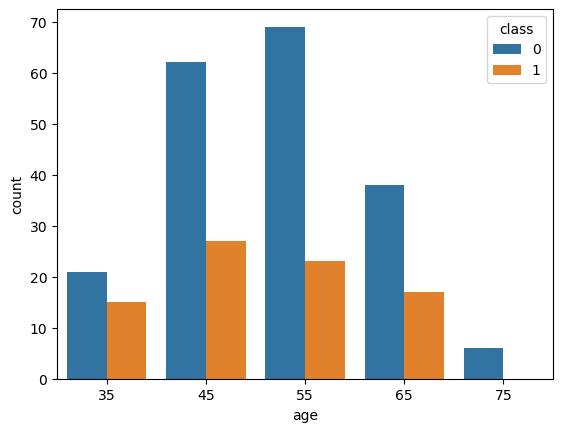

In [48]:
df['age']=df['age'].replace(25,75)
sns.countplot(x='age',hue='class',data=df)
plt.show()


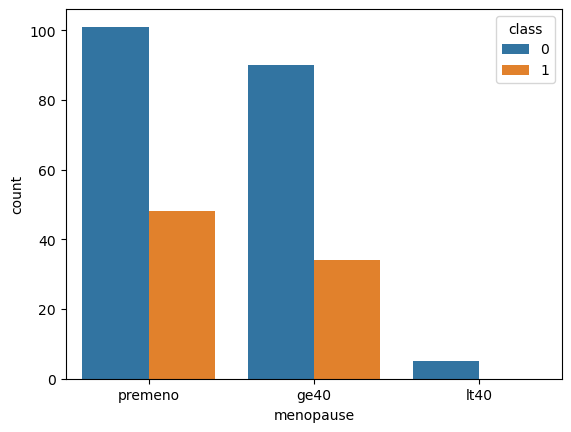

In [49]:
sns.countplot(x='menopause',hue='class',data=df)
plt.show()

Recurrence of cancer is more in patients entered premeno and ge40 phases of menopause. let convert these values to numerical values.The patients in premeno stage ie those who not yet entered menopause and lt40 patient less than 40 years old are same because menopause occur after 40 years. So let's combine them.

/tmp/ipykernel_3981/1540019171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['menopause']=df['menopause'].replace({'premeno':0,'ge40':1,'lt40':0})


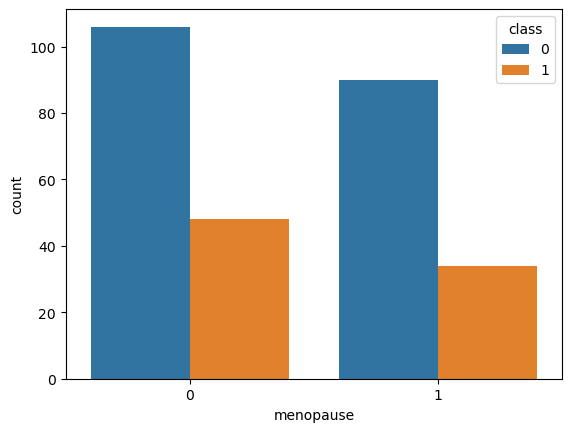

In [50]:
df['menopause']=df['menopause'].replace({'premeno':0,'ge40':1,'lt40':0})
sns.countplot(x='menopause',hue='class',data=df)
plt.show()


/tmp/ipykernel_3981/2885774504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tumor-size']=df['tumor-size'].replace({'0-4':2,'5-9':7,'10-14':12,'15-19':17,'20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,})


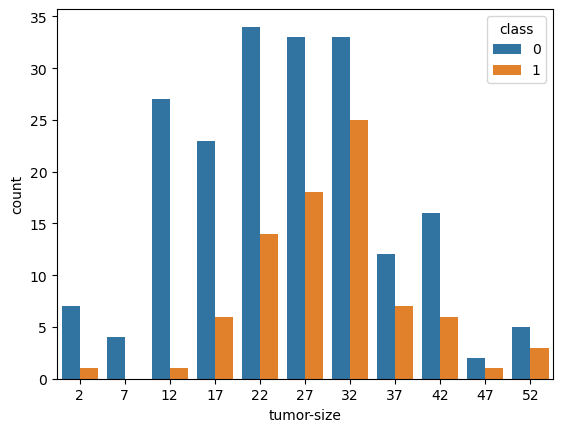

In [51]:
df['tumor-size']=df['tumor-size'].replace({'0-4':2,'5-9':7,'10-14':12,'15-19':17,'20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,})
sns.countplot(x='tumor-size',hue='class',data=df)
plt.show()

The analysis indicates a positive correlation between the size of the tumor and the probability of cancer recurrence.


/tmp/ipykernel_3981/1405172372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['inv-nodes']=df['inv-nodes'].replace({'0-2':1,'3-5':4,'6-8':7,'9-11':10,'12-14':13,'15-17':16,'24-26':25})


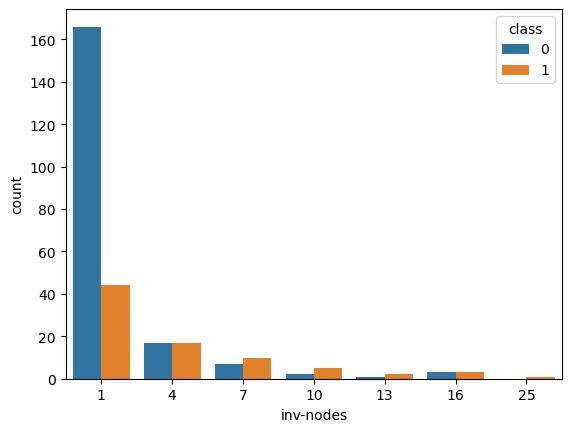

In [52]:
df['inv-nodes']=df['inv-nodes'].replace({'0-2':1,'3-5':4,'6-8':7,'9-11':10,'12-14':13,'15-17':16,'24-26':25})
sns.countplot(x='inv-nodes',hue='class',data=df)
plt.show()

As the number of invasive lymph nodes increases, the probability of recurrence also increases.

/tmp/ipykernel_3981/314379999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['node-caps']=df['node-caps'].replace({'no':0,'yes':1})


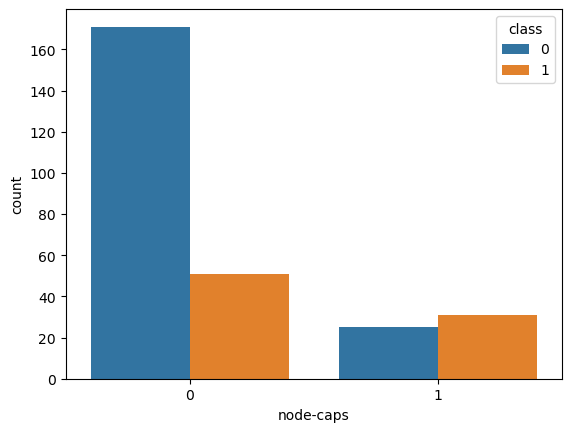

In [53]:
df['node-caps']=df['node-caps'].replace({'no':0,'yes':1})
sns.countplot(x='node-caps',hue='class',data=df)
plt.show()

The probability of recurrence is substantially higher when the cancer has spread beyond the wall of the lymph nodes (i.e., when node-caps is 'yes').

/tmp/ipykernel_3981/1192044277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['breast']=df['breast'].replace({'left':0,'right':1})


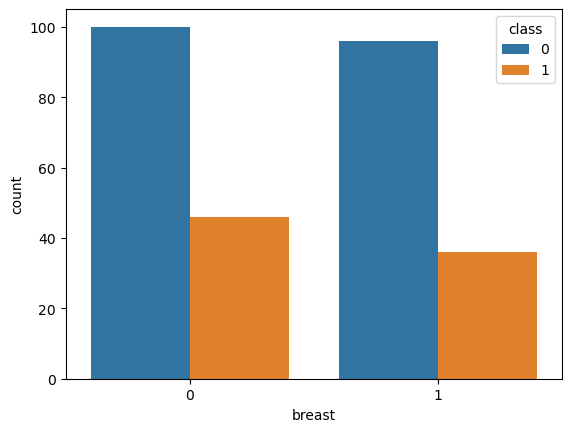

In [54]:
df['breast']=df['breast'].replace({'left':0,'right':1})
sns.countplot(x='breast',hue='class',data=df)
plt.show()

The probability of recurrence was found to be almost equal for both the left and right breast. This suggests that the side of the breast is not a significant predictor. So we can remove 'breast' column from the dataset.

In [55]:
df=df.drop(['breast'],axis=1)
df.shape

(278, 8)

/tmp/ipykernel_3981/876279496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['irradiat']=df['irradiat'].replace({'no':0,'yes':1})


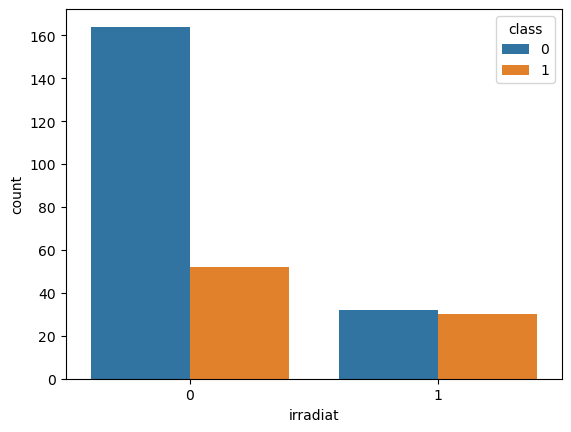

In [56]:
df['irradiat']=df['irradiat'].replace({'no':0,'yes':1})
sns.countplot(x='irradiat',hue='class',data=df)
plt.show()

Patients who have undergone radiation therapy show a higher probability of cancer recurrence.

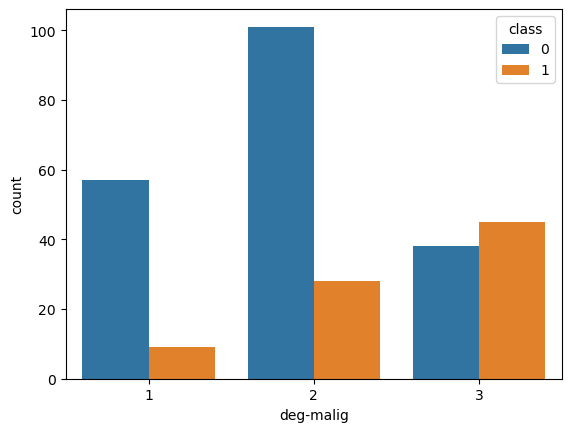

In [57]:
sns.countplot(x='deg-malig',hue='class',data=df)
plt.show()

 As the degree of malignancy increases, so does the likelihood of recurrence.

In [58]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'irradiat'],
      dtype='object')

<Axes: >

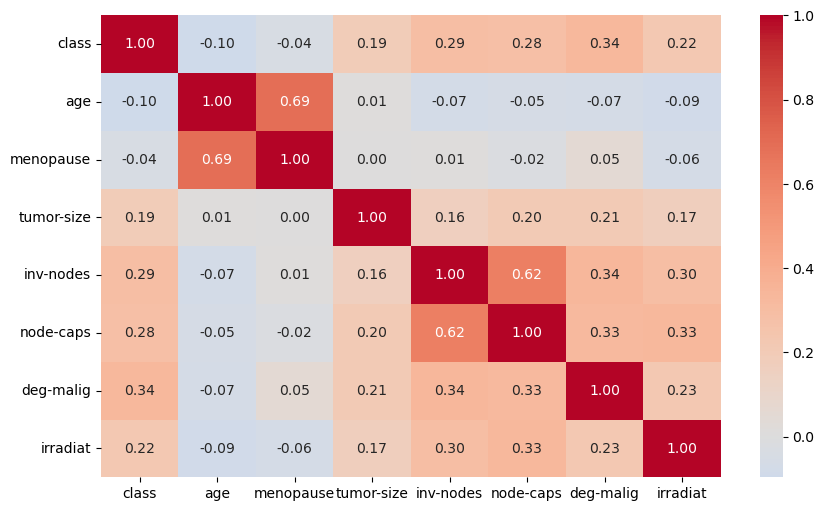

In [59]:
cols=['class','age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'irradiat']
ncols = df[cols].select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[ncols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

The columns are not highly  correlated with each other.

In [60]:
ncl2 = df.select_dtypes(include=np.number).columns
SKEW_THRESHOLD = 2.0
KURT_THRESHOLD = 2.0
ZERO_RATIO_THRESHOLD = 0.10
dft = df.copy()
stats_list = []
for col in ncl2:
    series = dft[col]
    skew_before = series.skew()
    kurt_before = series.kurtosis()
    std_before = series.std()
    transform_type = "NA"
    transform_needed = "No"
    skew_after = skew_before
    kurt_after = kurt_before
    std_after = std_before

    if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD:
        zero_ratio = (series == 0).mean()

        if zero_ratio <= ZERO_RATIO_THRESHOLD and (series > 0).all():
            transform_type = "log"
            dft[col] = np.log(series)
        else:
            transform_type = "log1p"
            dft[col] = np.log1p(series.clip(lower=0))

        transform_needed = "Yes"
        skew_after = dft[col].skew()
        kurt_after = dft[col].kurtosis()
        std_after = dft[col].std()

    stats_list.append({
        "numeric_column": col,
        "skew_before": skew_before,
        "kurtosis_before": kurt_before,
        "std_before": std_before,
        "log_transform_needed": transform_needed,
        "log_type": transform_type,
        "skew_after": skew_after,
        "kurtosis_after": kurt_after,
        "std_after": std_after
    })

stat_df = pd.DataFrame(stats_list)
stat_df

,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,class,0.904114,-1.191200,0.456849,No,NA,0.904114,-1.191200,0.456849
1,age,0.075033,-0.694810,10.057880,No,NA,0.075033,-0.694810,10.057880
2,menopause,0.218275,-1.966556,0.497977,No,NA,0.218275,-1.966556,0.497977
3,tumor-size,0.052050,-0.041343,10.648285,No,NA,0.052050,-0.041343,10.648285
4,inv-nodes,3.080230,11.251322,3.408155,Yes,log,1.546068,0.977213,0.823491
5,node-caps,1.496893,0.242381,0.401798,No,NA,1.496893,0.242381,0.401798
6,deg-malig,-0.095076,-1.116900,0.730858,No,NA,-0.095076,-1.116900,0.730858
7,irradiat,1.337985,-0.211369,0.417023,No,NA,1.337985,-0.211369,0.417023


The inv-nodes column was highly skewed. A log transformation is applied to this column to normalize its distribution

In [61]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
class,0,0,0,0,0,0,0,0,0,0
age,35,45,45,65,45,65,55,65,45,45
menopause,0,0,0,1,0,1,0,1,0,0
tumor-size,32,22,22,17,2,17,27,22,52,22
inv-nodes,1,1,1,1,1,1,1,1,1,1
node-caps,0,0,0,0,0,0,0,0,0,0
deg-malig,3,2,2,2,2,2,2,1,2,2
irradiat,0,0,0,0,0,0,0,0,0,0


In [62]:
import pickle as pkl
with open('us_130.pkl', 'wb') as f:
    pkl.dump(df,f)
print("done")

done


The goal is to predict whether a patient will experience a recurrence of cancer based on several clinical attributes. The dataset contains 10 columns: class, age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, and irradiat.missing values represented by a '?' character in the node-caps and breast-quad columns. The percentage of these missing values was very low.So we removed these missing values from the data.Several preprocessing steps were executed to clean the data they are;                     
.The breast-quad column was unnecessary for the model since the breast column already provides information about the location of the cancer.Therefore, it was dropped.
.Categorical and object-type columns were converted into numerical formats to be used in the predictive model.
.Done visual analysis to get insinghts about how the factors influence the cancer recurrece.
.The probability of recurrence was found to be almost equal for both the left and right breast.This suggests that the side of the breast is not a significant predictor, and the breast column was subsequently removed from the dataset.
.Heatmap analysis of the numerical columns showed that the columns were not highly correlated with each other.
.An analysis of skewness and kurtosis was performed;A log transformation was applied to inv-nodes  to normalize its distribution.

The data is successfully cleaned and analyzed. The dataset is now ready for training of a machine learning model to predict breast cancer recurrence.